# Importing Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import shap


# Loading Data

In [2]:
df = pd.read_csv("learning_data(learning_data).csv")


# Drop student_id (non-informative)

In [3]:

df.drop("student_id", axis=1, inplace=True)


# Encode categorical variables

In [4]:

label_encoders = {}
for col in ["gender", "course_type"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Exploratory Data Analysis

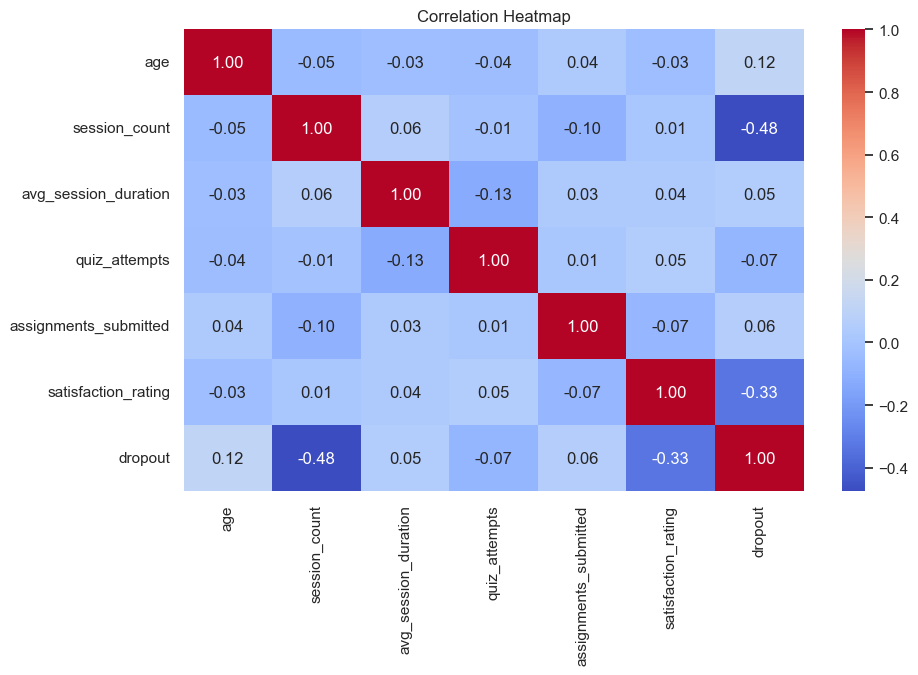

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


numeric_features = df.drop(columns=["gender", "course_type"])
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


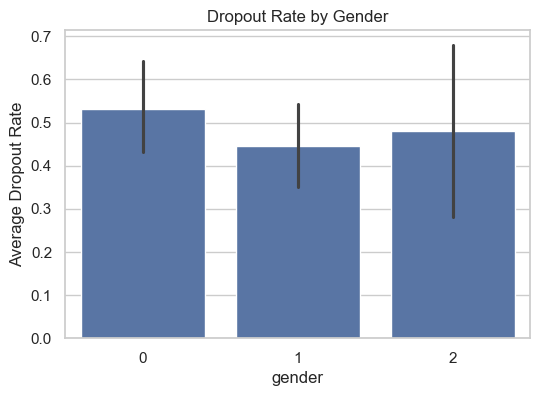

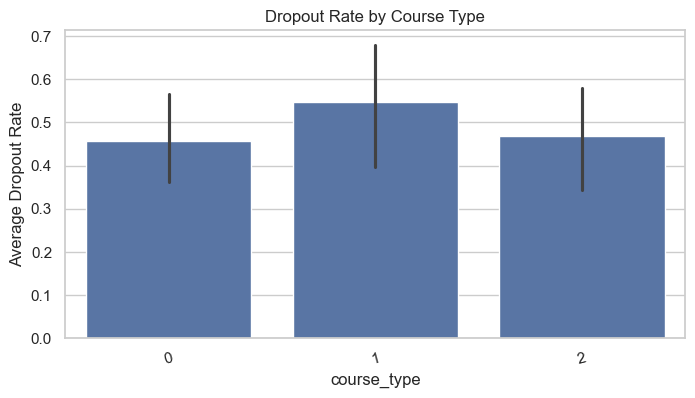

In [8]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="gender", y="dropout")
plt.title("Dropout Rate by Gender")
plt.ylabel("Average Dropout Rate")
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=df, x="course_type", y="dropout")
plt.title("Dropout Rate by Course Type")
plt.ylabel("Average Dropout Rate")
plt.xticks(rotation=15)
plt.show()


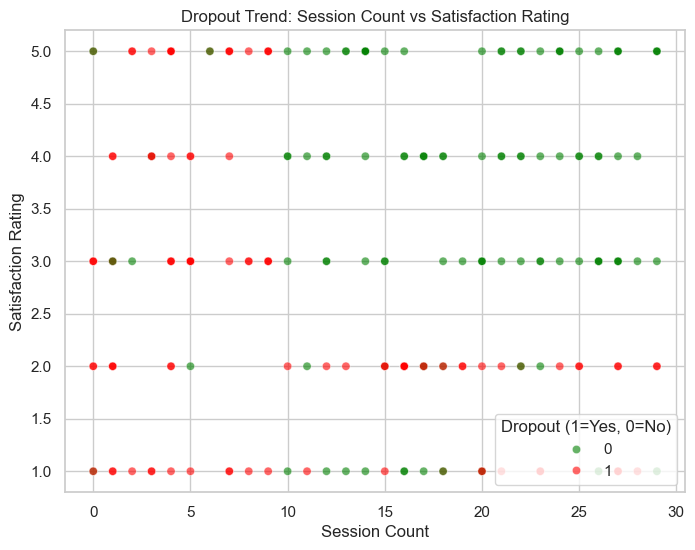

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="session_count",
    y="satisfaction_rating",
    hue="dropout",
    palette={0: "green", 1: "red"},
    alpha=0.6
)
plt.title("Dropout Trend: Session Count vs Satisfaction Rating")
plt.xlabel("Session Count")
plt.ylabel("Satisfaction Rating")
plt.legend(title="Dropout (1=Yes, 0=No)")
plt.grid(True)
plt.show()


# Features and Target with Split 80-20

In [10]:

X = df.drop(["dropout"], axis=1)
y = df["dropout"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model Development

In [11]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


##  Model Evaluation

In [12]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Logistic Regression Evaluation:
Accuracy: 0.775
Precision: 0.7
Recall: 0.8235294117647058
F1 Score: 0.7567567567567568

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79        23
           1       0.70      0.82      0.76        17

    accuracy                           0.78        40
   macro avg       0.77      0.78      0.77        40
weighted avg       0.79      0.78      0.78        40


Random Forest Evaluation:
Accuracy: 0.8
Precision: 0.7142857142857143
Recall: 0.8823529411764706
F1 Score: 0.7894736842105263

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81        23
           1       0.71      0.88      0.79        17

    accuracy                           0.80        40
   macro avg       0.80      0.81      0.80        40
weighted avg       0.82      0.80      0.80        40



# ROC Curve

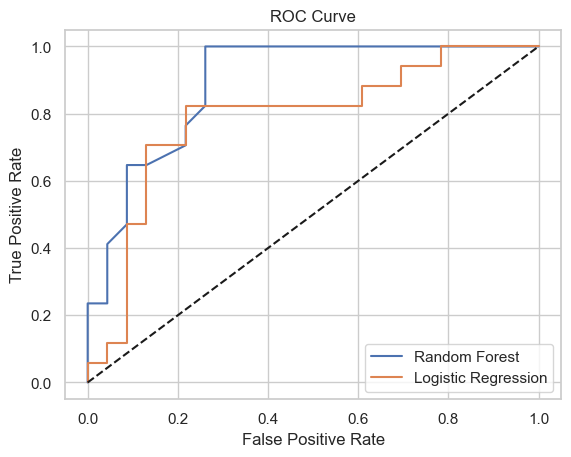

In [13]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## SHAP Analysis Using XGB Model {Bonus}

In [14]:
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

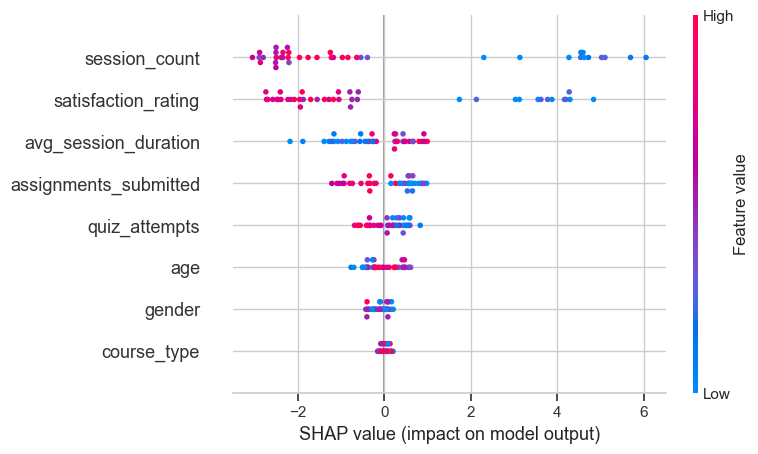

In [15]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

if y.dtype == object:
    y = LabelEncoder().fit_transform(y)

X = pd.get_dummies(X)

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training the model (XGBoost)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

#SHAP analysis
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

#Plot summary
shap.summary_plot(shap_values, X_test)

# Student Dropout Prediction - Data Insights & Modeling

---

## 📊 Data Insights

The dataset pertains to **student learning behavior and dropout tendencies**.

### Key Features:
- Gender  
- Course Type  
- Session Count  
- Satisfaction Rating  
- (and more)

### Exploratory Analysis Highlights:
- **Dropout rates** vary by **gender** and **course type**.
- **Lower satisfaction ratings** and **fewer sessions** are associated with **higher dropout rates**.
- Some features are **moderately correlated**, as visualized via a **heatmap**.

---

## 🤖 Modeling Approach

### 🔧 Preprocessing:
- Dropped non-informative feature: `student_id`
- Encoded categorical variables: `gender`, `course_type`
- Standardized numerical features using `StandardScaler`

### ✂️ Train-Test Split:
- **80%** Training Data  
- **20%** Testing Data

### Models Used:
- **Logistic Regression**  
  - Simple linear model used as a **baseline**
- **Random Forest Classifier**  
  - **Ensemble method** providing generally **better performance**

---

## 📈 Evaluation Results

Both models were evaluated using the following metrics:
- Accuracy  
- Precision  
- Recall  
- F1-Score  

### Model Insights:
- **Logistic Regression**:
  - Easy to interpret, baseline model.
- **Random Forest**:
  - More robust and typically outperforms logistic regression due to ensemble learning.

> *Metrics such as F1-score and full classification reports were printed, but not shown in this preview.*

---

## 💼 Business Recommendations

- **Focus retention** strategies on students with:
  - **Low satisfaction ratings**
  - **Fewer session counts**  
  (Strong indicators of potential dropout)

- **Tailor engagement strategies** based on:
  - **Course Type**
  - **Gender**  
  (Since dropout patterns vary across segments)

- Implement **automated alerts** for **at-risk students** based on model predictions to enable **early intervention** and reduce dropout rates.

---
